# Traitement de données audio en Python
## Séance 1

Manipulations simples avec le package [Pydub](http://pydub.com/)

Nous allons présenter des exemples de traitement sur le fichier [electric_cello.wav](../audio/electric_cello.wav)

## Données audio

Dans ce cours on travaille directement sur de l’audio numérisé, des fichiers numériques  
Nous ne parlerons pas d’acquisition du signal

Un rappel tout de même sur les paramètres de numérisation d’un signal audio (musique, voix, sons) : 
 - le nombre de canaux : mono (1), stéréo (2), multicanaux
 - la fréquence d’échantillonnage, c-a-d le nombre d’échantillons par seconde
 - la résolution de chaque échantillon en bits
 - compression ou non des données, pensez au mp3  
     ici nous ne travaillerons qu’avec des données audio non compressées

Ces points définissent l’encodage d’un fichier audio

En connaissant le nombre d’échantillons, on peut calculer la durée de l’enregistrement ainsi que la taille du fichier


In [1]:
import wave
wave_obj = wave.open('../audio/electric_cello.wav', 'rb')
parameters = wave_obj.getparams()
print(parameters)

_wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=1170432, comptype='NONE', compname='not compressed')


On utilise un module Python (`wave`), il faut consulter sa documentation : [https://docs.python.org/3/library/wave.html](https://docs.python.org/3/library/wave.html)

In [2]:
# avec le nombre de frames ('nframes') et le taux d’échantillonnage ('framerate')
# je peux calculer la durée en secondes

duration = parameters.nframes / parameters.framerate
print(duration)

24.384


Pour la taille c’est un peu plus compliqué d’autant qu’il peut y avoir un delta entre la taille calculée et la taille sur le système de fichiers

In [3]:
compute_file_size = parameters.nframes * parameters.nchannels * parameters.sampwidth
print(f"La taille calculée est de {compute_file_size} octets (bytes)")

La taille calculée est de 4681728 octets (bytes)


In [4]:
import os

file_size = os.path.getsize('../audio/electric_cello.wav')
print(f"La taille du fichier est de {file_size} octets")

La taille du fichier est de 4681940 octets


In [5]:
delta = file_size - compute_file_size
print(f"Le delta est de {delta} octets")

Le delta est de 212 octets


Le format `wav` est un conteneur. Il contient le signal encodé mais aussi un en-tête de 44 octets, voir la [doc Wikipedia](https://fr.wikipedia.org/wiki/Waveform_Audio_File_Format#En-t%C3%AAte_de_fichier_WAV)

Pour le moment nous n’avons ni écoute du signal ni visualisation. Ce n’est pas très commode pour manipuler des données audio

La visulisation n’est pas le plus simple, nous allons faire appel à NumPy et Matplotlib

In [83]:
import numpy as np
import matplotlib.pyplot as plt

wave_obj = wave.open('../audio/electric_cello.wav', 'rb')
frame_rate = wave_obj.getframerate()
data = np.frombuffer(wave_obj.readframes(frame_rate), dtype=np.int16) # les données PCM
left, right = data[0::2], data[1::2] # on distingue les 2 canaux (gauche, droite) pour n’en afficher qu’un

<Figure size 432x288 with 0 Axes>

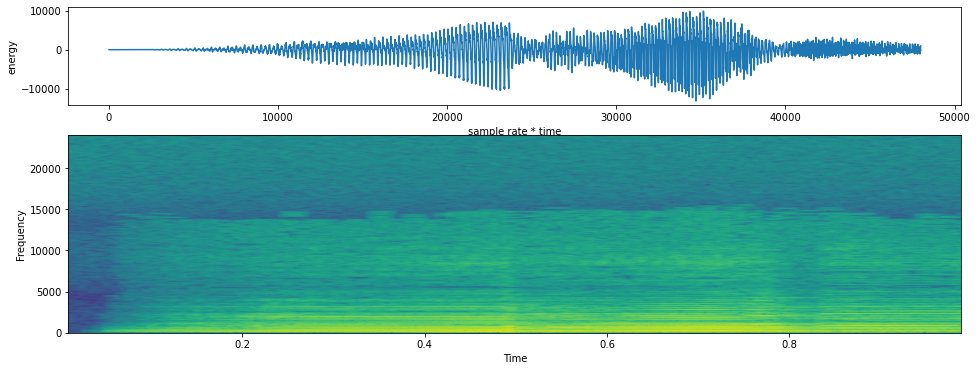

In [85]:
plt.figure(1)

fig, axes = plt.subplots(2,1, figsize=(16,6), gridspec_kw={'height_ratios': [1, 2]})
axes[0].plot(left)
axes[0].set_xlabel('sample rate * time')
axes[0].set_ylabel('energy')

axes[1].specgram(left, NFFT=1024, Fs=frame_rate, noverlap=900)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')

plt.show()

In [6]:
Ipython.display.Audio

NameError: name 'Ipython' is not defined

L’écoute du signal sera plus simple à mettre en œuvre grâce au package [Pydub](http://pydub.com/)

In [64]:
from pydub import AudioSegment
from pydub.playback import play

# Load the WAV file
audio = AudioSegment.from_file("../audio/electric_cello.wav")

# Play the audio
play(audio)

Input #0, wav, from '/tmp/tmp2twbjw0l.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:24.38, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


Nouveau package, vite vite on va voir la [documentation](https://github.com/jiaaro/pydub/blob/master/API.markdown)  
Et même puisque c’est proposé, on va lire le code source de notre fonction [play](https://github.com/jiaaro/pydub/blob/996cec42e9621701edb83354232b2c0ca0121560/pydub/playback.py#L51)

## Exercices

En utilisant le package Pydub et sa documentation :

1. Afficher les paramètres d’encodage de notre fichier
2. Extraire les 10 premières secondes de notre fichier son et les écouter
3. Extraire les 20 dernières secondes et les exporter en wav

